In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
data=pd.read_csv('C:\\Users\\lenovo\\OneDrive\\data science\\assignment\\multi linear regression\\50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [102]:
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [3]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
data_1=pd.get_dummies(data=data,columns=['State'],drop_first=True)
data_1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
x=data_1.drop(columns=['Profit']).values
y=data_1['Profit'].values

In [9]:
Y=y.reshape(-1,1)

In [10]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)

In [11]:
print(X_scaled)

[[ 2.01641149e+00  5.60752915e-01  2.15394309e+00 -6.85994341e-01
   1.39326109e+00]
 [ 1.95586034e+00  1.08280658e+00  1.92360040e+00 -6.85994341e-01
  -7.17740563e-01]
 [ 1.75436374e+00 -7.28257028e-01  1.62652767e+00  1.45773797e+00
  -7.17740563e-01]
 [ 1.55478369e+00 -9.63646307e-02  1.42221024e+00 -6.85994341e-01
   1.39326109e+00]
 [ 1.50493720e+00 -1.07991935e+00  1.28152771e+00  1.45773797e+00
  -7.17740563e-01]
 [ 1.27980001e+00 -7.76239071e-01  1.25421046e+00 -6.85994341e-01
   1.39326109e+00]
 [ 1.34006641e+00  9.32147208e-01 -6.88149930e-01 -6.85994341e-01
  -7.17740563e-01]
 [ 1.24505666e+00  8.71980011e-01  9.32185978e-01  1.45773797e+00
  -7.17740563e-01]
 [ 1.03036886e+00  9.86952101e-01  8.30886909e-01 -6.85994341e-01
   1.39326109e+00]
 [ 1.09181921e+00 -4.56640246e-01  7.76107440e-01 -6.85994341e-01
  -7.17740563e-01]
 [ 6.20398248e-01 -3.87599089e-01  1.49807267e-01  1.45773797e+00
  -7.17740563e-01]
 [ 5.93085418e-01 -1.06553960e+00  3.19833623e-01 -6.85994341e-01

In [12]:
Y_scaled=scaler.fit_transform(Y)

In [13]:
Y_scaled

array([[ 2.01120333],
       [ 1.99942997],
       [ 1.98084225],
       [ 1.77662724],
       [ 1.35774012],
       [ 1.12724963],
       [ 1.10548055],
       [ 1.09620987],
       [ 1.00746967],
       [ 0.94602247],
       [ 0.85484675],
       [ 0.80816756],
       [ 0.74115484],
       [ 0.55874952],
       [ 0.51602637],
       [ 0.44871967],
       [ 0.3754357 ],
       [ 0.33477114],
       [ 0.307116  ],
       [ 0.26977265],
       [ 0.16193522],
       [-0.01753384],
       [-0.04161264],
       [-0.08216943],
       [-0.08672946],
       [-0.11549309],
       [-0.15736664],
       [-0.17554233],
       [-0.21879755],
       [-0.27588222],
       [-0.3026246 ],
       [-0.36412744],
       [-0.36552389],
       [-0.38178711],
       [-0.38344421],
       [-0.38929092],
       [-0.53393161],
       [-0.5529549 ],
       [-0.77149734],
       [-0.77709368],
       [-0.84641135],
       [-0.85746568],
       [-1.01536466],
       [-1.05896021],
       [-1.17320899],
       [-1

In [14]:
x_data=pd.DataFrame(X_scaled,columns=['RD','Adm','Mktg','S_F','S_N'])

In [15]:
x_data.head()

,RD,Adm,Mktg,S_F,S_N
0,2.016411,0.560753,2.153943,-0.685994,1.393261
1,1.955860,1.082807,1.923600,-0.685994,-0.717741
2,1.754364,-0.728257,1.626528,1.457738,-0.717741
3,1.554784,-0.096365,1.422210,-0.685994,1.393261
4,1.504937,-1.079919,1.281528,1.457738,-0.717741


In [16]:
y_data=pd.DataFrame(Y_scaled,columns=['Profit'])

In [17]:
y_data.head()

,Profit
0,2.011203
1,1.999430
2,1.980842
3,1.776627
4,1.357740


In [18]:
x_data["Profit"]=y_data

In [19]:
x_data.head()

,RD,Adm,Mktg,S_F,S_N,Profit
0,2.016411,0.560753,2.153943,-0.685994,1.393261,2.011203
1,1.955860,1.082807,1.923600,-0.685994,-0.717741,1.999430
2,1.754364,-0.728257,1.626528,1.457738,-0.717741,1.980842
3,1.554784,-0.096365,1.422210,-0.685994,1.393261,1.776627
4,1.504937,-1.079919,1.281528,1.457738,-0.717741,1.357740


In [20]:
model=smf.ols('Profit~RD+Adm+Mktg+S_F+S_N',data=x_data).fit()

In [21]:
model.params

Intercept   -5.204170e-16
RD           9.179307e-01
Adm         -1.877136e-02
Mktg         8.185781e-02
S_F          2.324003e-03
S_N         -4.972860e-04
dtype: float64

In [22]:
model.fittedvalues

0     2.014430
1     1.931243
2     1.760943
3     1.543124
4     1.510347
5     1.289719
6     1.155023
7     1.206559
8     0.993008
9     1.073079
10    0.592766
11    0.589356
12    0.432827
13    0.386421
14    0.944379
15    0.855390
16    0.121336
17    0.452939
18    0.429489
19    0.089761
20    0.114235
21    0.130043
22    0.070691
23   -0.047338
24    0.032123
25   -0.245917
26   -0.031261
27    0.056820
28   -0.255483
29   -0.257928
30   -0.310358
31   -0.360776
32   -0.326417
33   -0.349647
34   -0.577376
35   -0.541154
36   -0.917006
37   -0.562264
38   -1.062781
39   -0.709947
40   -0.933556
41   -0.928705
42   -1.038484
43   -1.301027
44   -1.188627
45   -1.614600
46   -1.396946
47   -1.642672
48   -1.576137
49   -1.599646
dtype: float64

In [23]:
model.resid

0    -0.003227
1     0.068187
2     0.219899
3     0.233503
4    -0.152607
5    -0.162469
6    -0.049542
7    -0.110349
8     0.014461
9    -0.127057
10    0.262081
11    0.218811
12    0.308328
13    0.172329
14   -0.428353
15   -0.406671
16    0.254100
17   -0.118168
18   -0.122373
19    0.180012
20    0.047700
21   -0.147577
22   -0.112304
23   -0.034831
24   -0.118852
25    0.130424
26   -0.126106
27   -0.232362
28    0.036686
29   -0.017954
30    0.007734
31   -0.003352
32   -0.039107
33   -0.032140
34    0.193932
35    0.151863
36    0.383075
37    0.009309
38    0.291284
39   -0.067146
40    0.087145
41    0.071239
42    0.023120
43    0.242066
44    0.015418
45    0.434517
46   -0.169976
47   -0.097955
48   -0.337075
49   -0.839667
dtype: float64

In [24]:
model.rsquared

0.9507524843355148

In [25]:
print(model.tvalues,model.pvalues)

Intercept   -1.555556e-14
RD           1.736858e+01
Adm         -5.170116e-01
Mktg         1.573889e+00
S_F          5.897015e-02
S_N         -1.286441e-02
dtype: float64 Intercept    1.000000e+00
RD           2.578772e-21
Adm          6.077373e-01
Mktg         1.226769e-01
S_F          9.532429e-01
S_N          9.897941e-01
dtype: float64


# correlation matrix

In [26]:
data_1.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,0.116244,0.031368
State_Florida,0.105711,0.010493,0.205685,0.116244,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.492366,1.000000


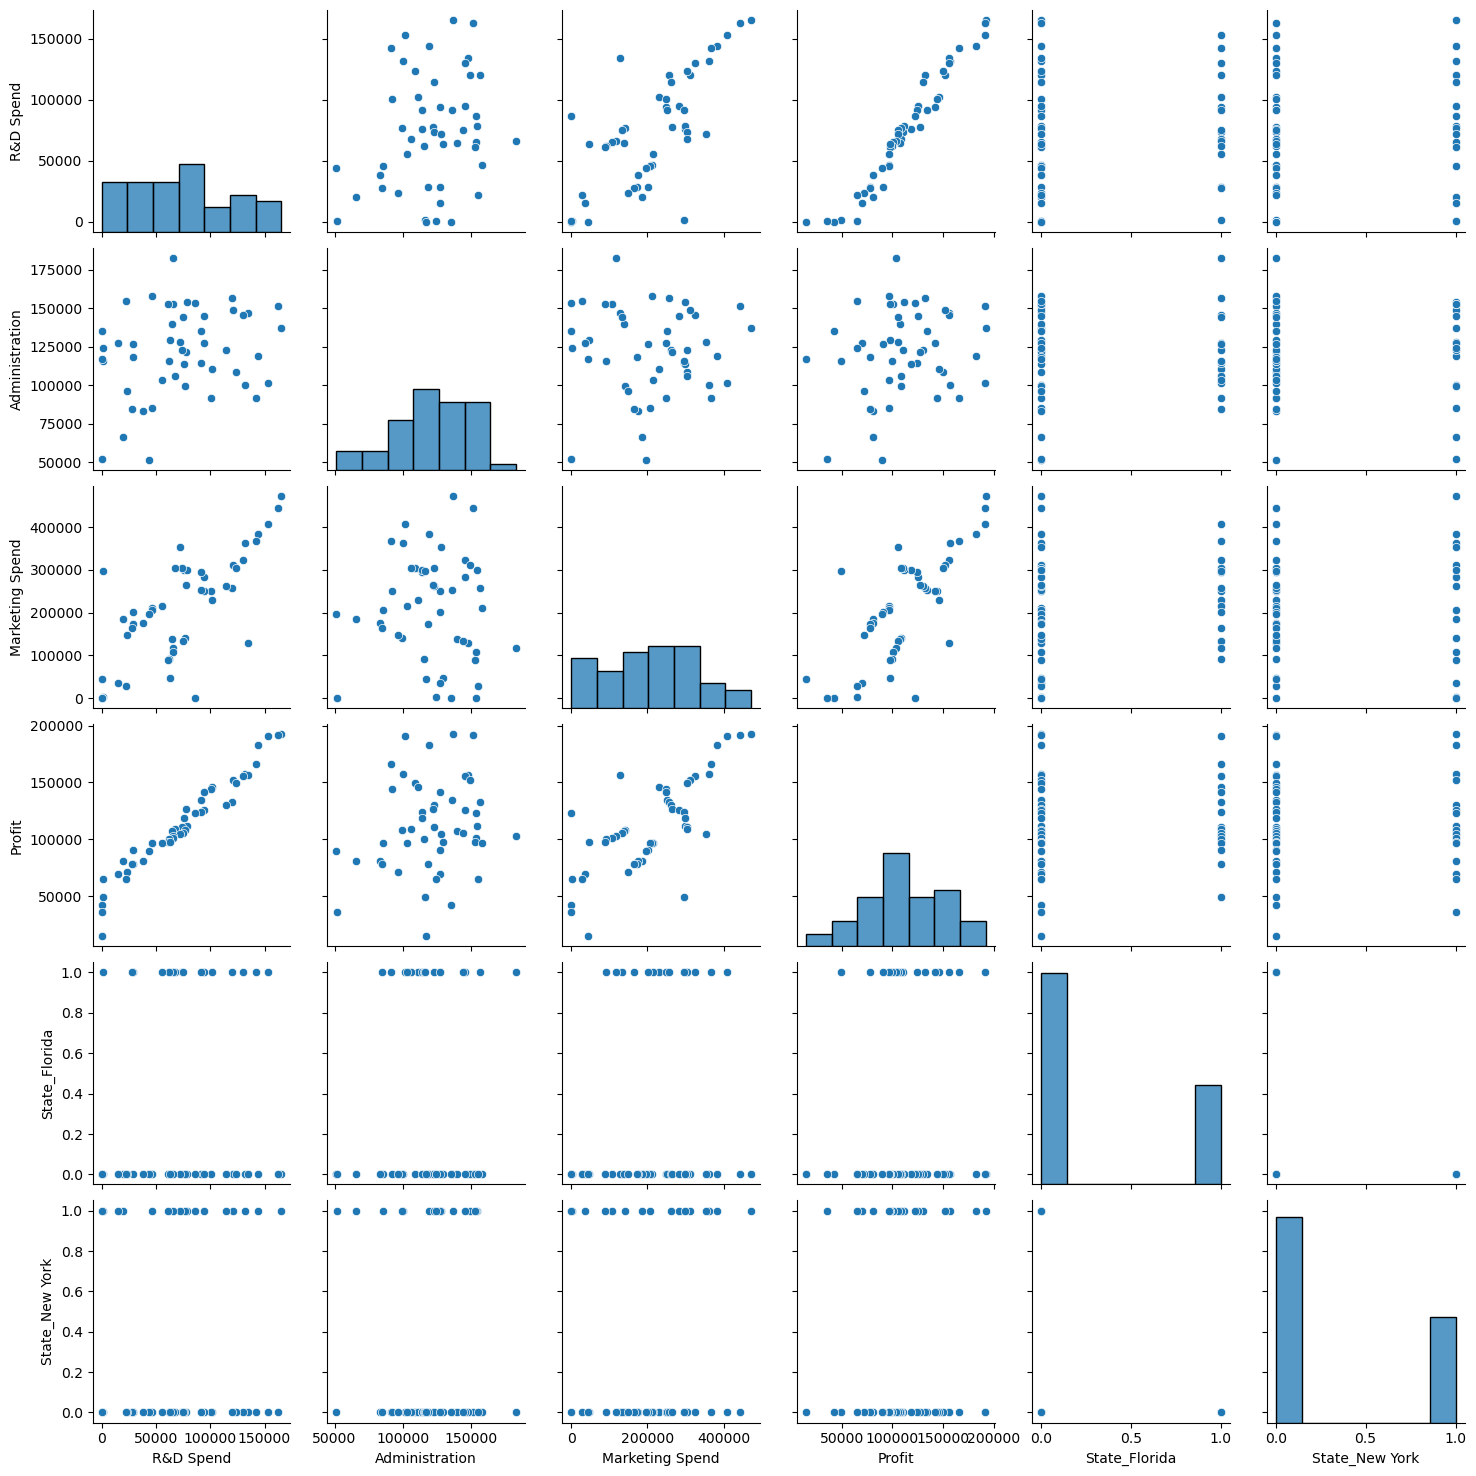

In [27]:
sns.pairplot(data_1)

In [28]:
#VIF
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
y, X = dmatrices('Profit~RD+Adm+Mktg+S_F+S_N', data=x_data, return_type='dataframe')

In [30]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

In [31]:
vif

,VIF,variable
0,1.000000,Intercept
1,2.495511,RD
2,1.177766,Adm
3,2.416797,Mktg
4,1.387641,S_F
5,1.335061,S_N


In [32]:
import statsmodels.api as sm

In [33]:
#build the model with Mktg
model1=smf.ols('Profit~Adm+Mktg+S_F+S_N',data=x_data).fit()

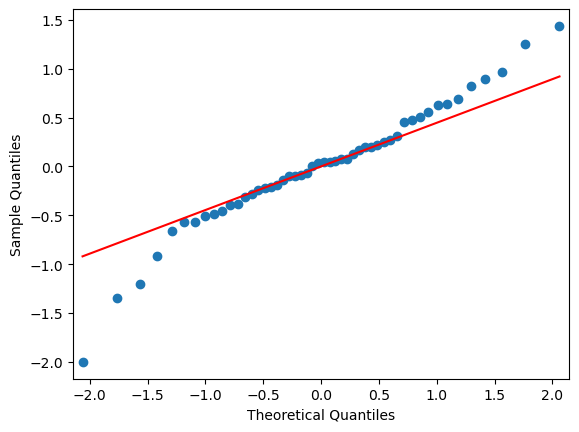

In [34]:
sm.qqplot(model1.resid,line='q')

In [35]:
#build the model with R&D
model2=smf.ols('Profit~RD+Adm+S_F+S_N',data=x_data).fit()

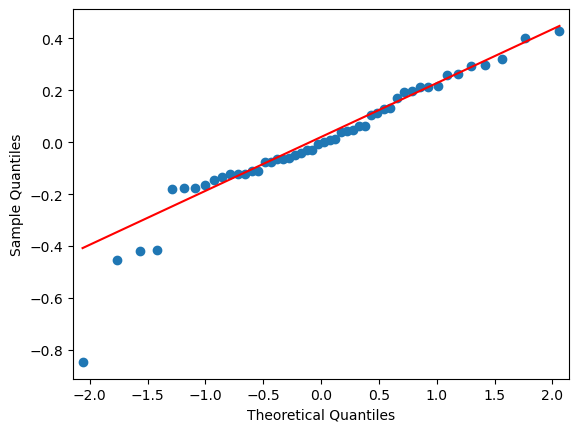

In [37]:
sm.qqplot(model2.resid,line='q')

In [49]:
# subset selection  #Mktg
print(model1.rsquared,vif.iloc[3:4,:])
print(model1.aic)

0.6131075019799208         VIF variable
3  2.416797     Mktg
104.41343294871618


In [51]:
# subset selection  #R&D
print(model2.rsquared,vif.iloc[1:2,:])
print(model2.aic)

0.9479799298023537         VIF variable
1  2.495511       RD
4.087569844126378


In [57]:
#subset selection with Mktg&R&D
print(model.rsquared)
print(model.aic)

0.9507524843355148
3.349035520614521


In [ ]:
#for model with all the variables rsquared/accuracy is high and aic is low so we bulid model with all predictor  variables

# Residual analysis

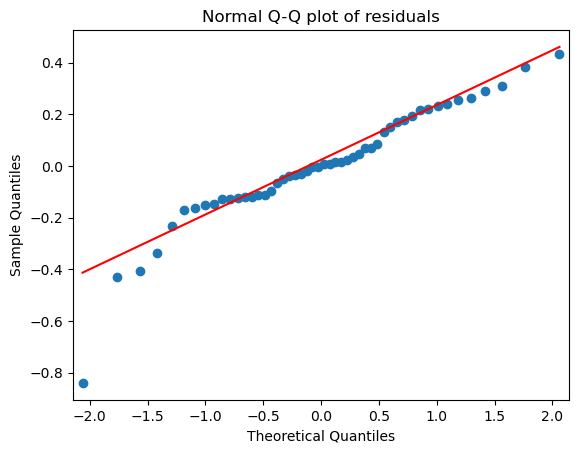

In [63]:
sm.qqplot(model.resid,line='q')
qqplot=plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual Plot for Homoscedasticity

In [71]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

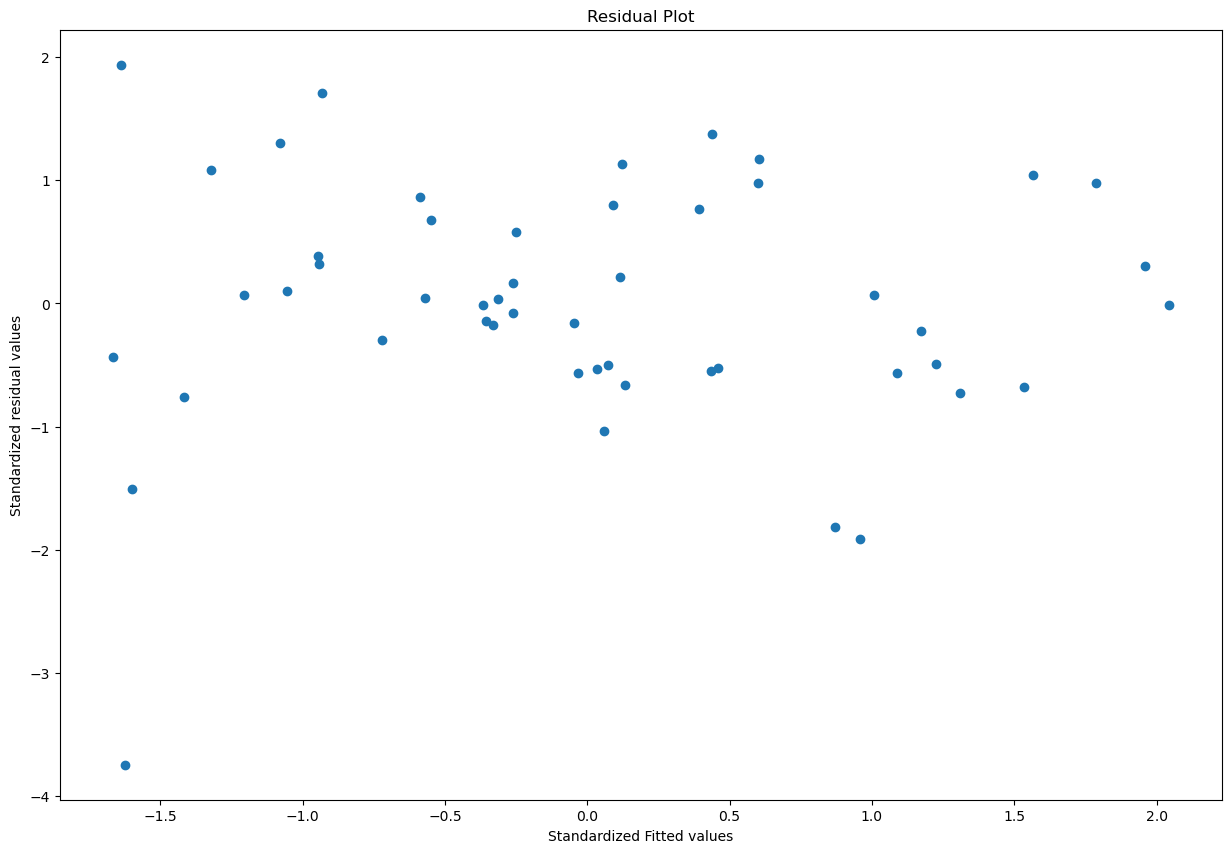

In [73]:
plt.figure(figsize=(15,10))
scatterplot=plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# From above plot it is clear there is no pattern between predicted and residual values 

# Residual vs regressor

eval_env: 1


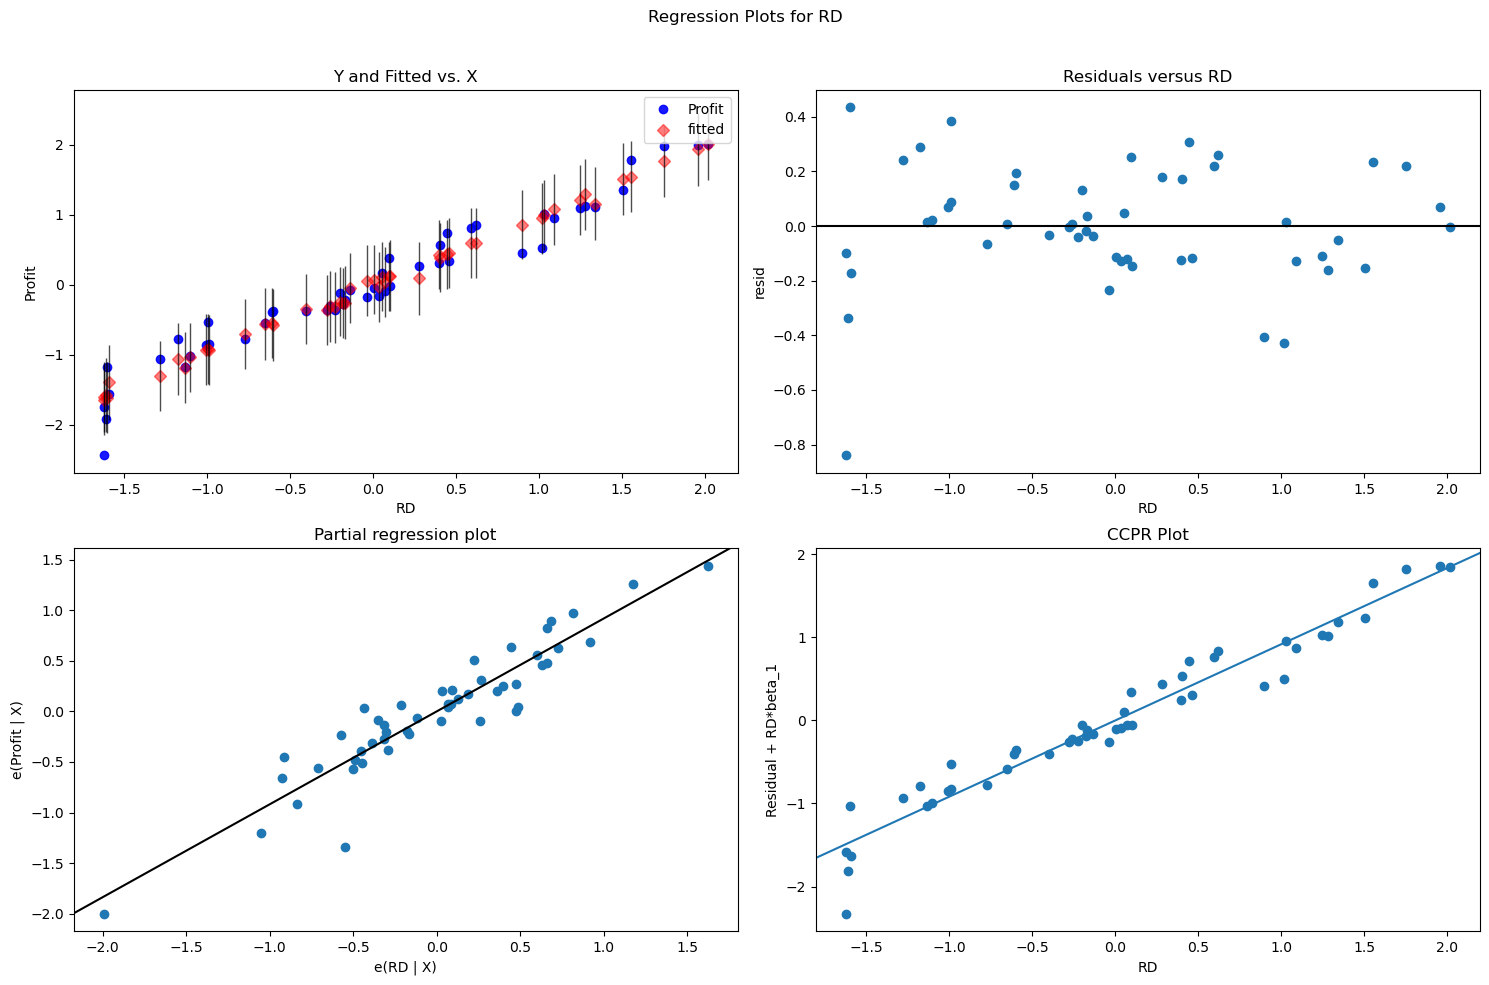

In [76]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "RD", fig=fig)
plt.show()

eval_env: 1


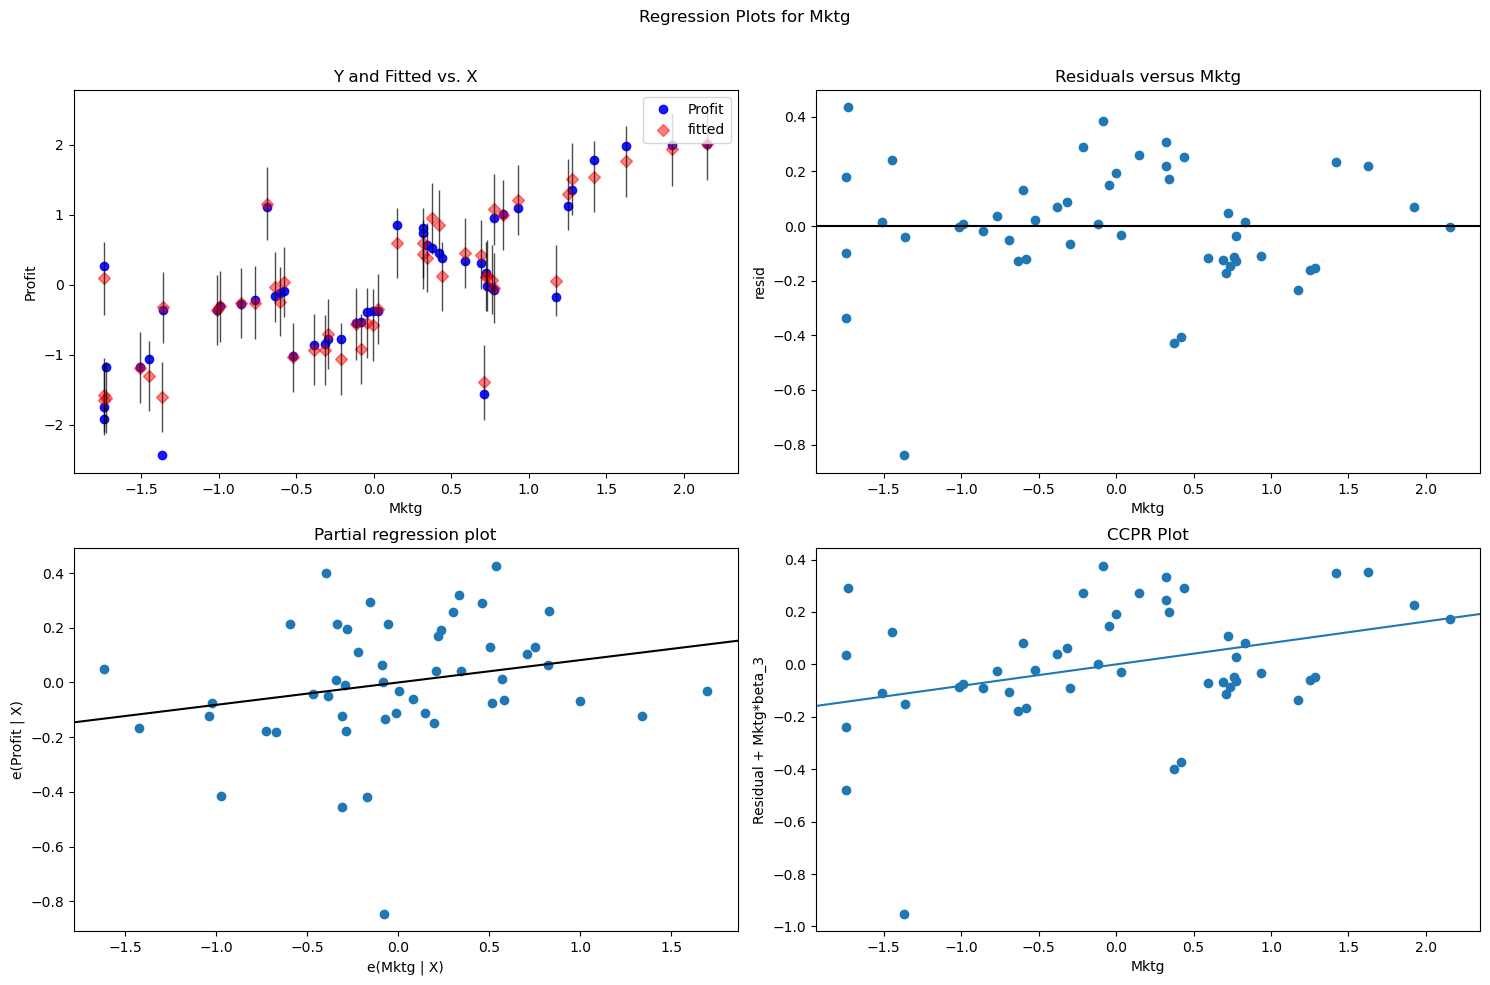

In [77]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Mktg", fig=fig)
plt.show()

eval_env: 1


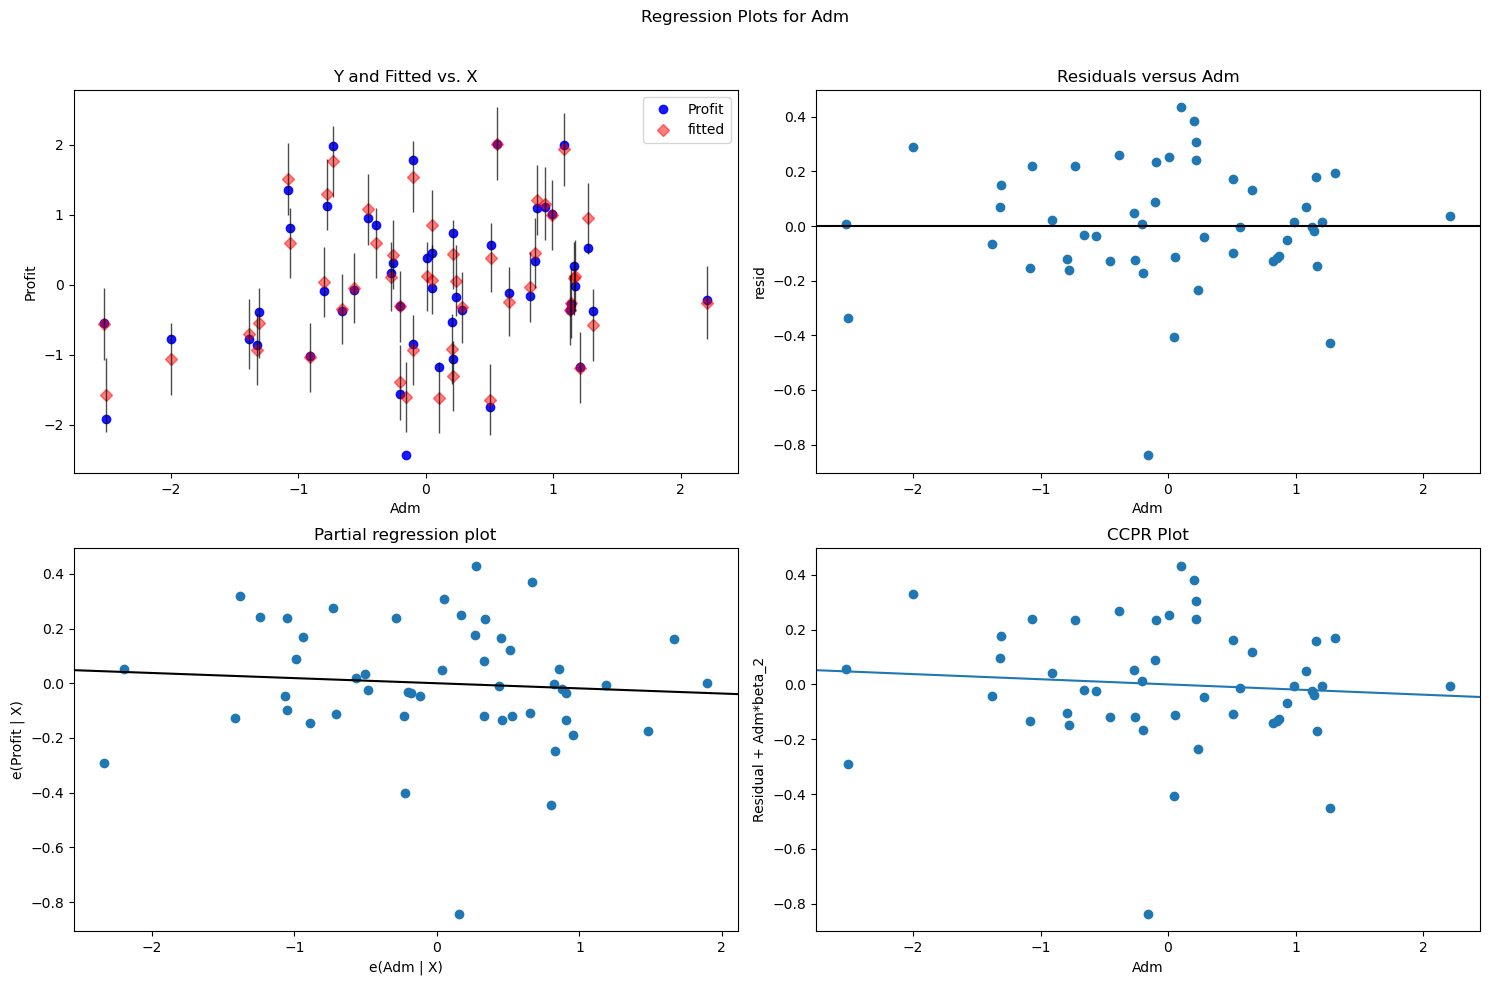

In [80]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Adm", fig=fig)
plt.show()

# outliers detection

In [79]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence=model.get_influence()
(c, _) = model_influence.cooks_distance

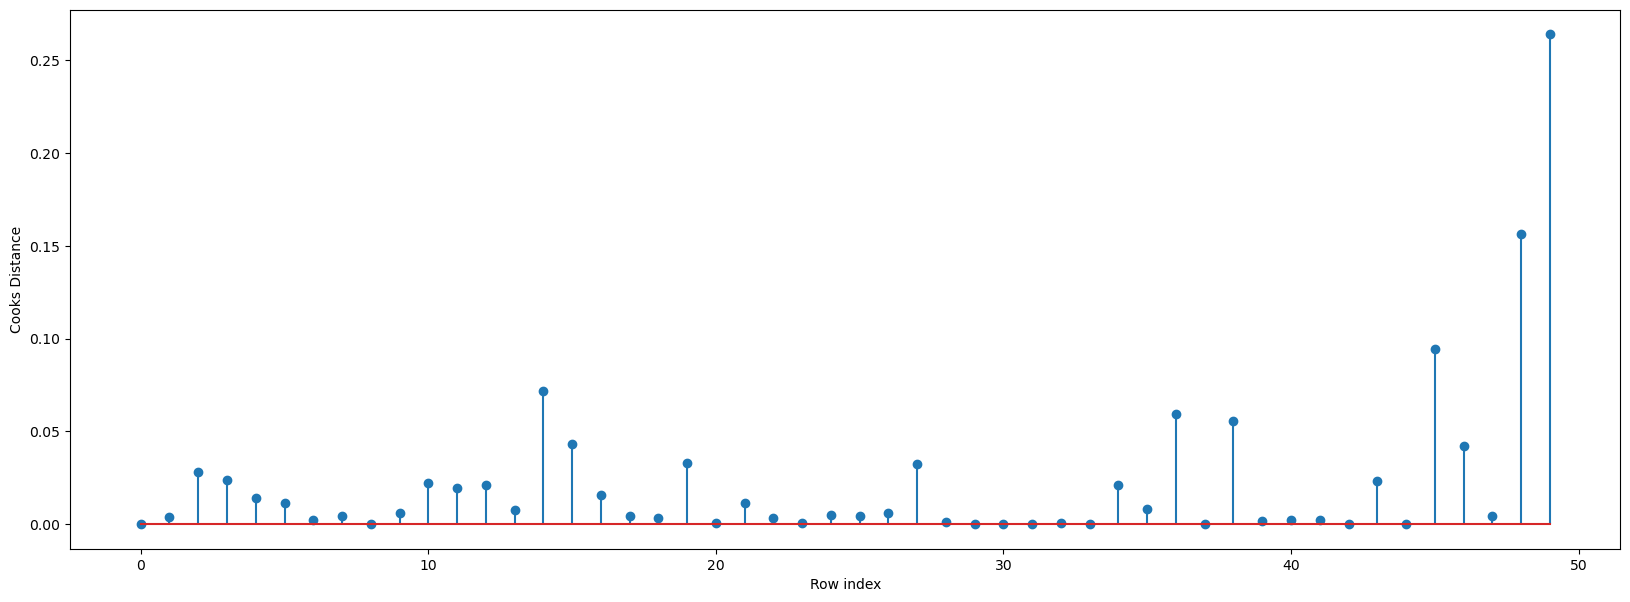

In [82]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(x_data)), np.round(c, 4))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [83]:
(np.argmax(c),np.max(c))

(49, 0.2639594358995209)

# high Leverage point

In [84]:
x_data.shape

(50, 6)

In [85]:
k = x_data.shape[1]
n = x_data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.42000000000000004

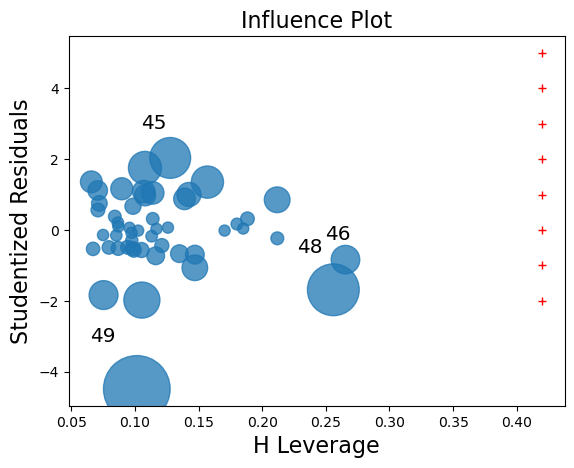

In [101]:
influence_plot(model,alhpa=0.5)

y=[i for i in range(-2,6)]
x=[leverage_cutoff for i in range(8)]
leverageplot1=plt.plot(x,y,'r+')

plt.show()

In [103]:
x_data[x_data.index.isin([48,49])]

,RD,Adm,Mktg,S_F,S_N,Profit
48,-1.610433,-2.509409,-1.743127,-0.685994,1.393261,-1.913212
49,-1.622362,-0.157226,-1.369985,-0.685994,-0.717741,-2.439313


In [105]:
data_P=x_data.drop(x_data.index[[48,49]],axis=0).reset_index()

In [109]:
data_P=data_P.drop(['index'],axis=1)

In [112]:
data_P.corr()

,RD,Adm,Mktg,S_F,S_N,Profit
RD,1.000000,0.173065,0.692606,0.063667,0.066887,0.978661
Adm,0.173065,1.000000,-0.144120,-0.029893,0.080861,0.110473
Mktg,0.692606,-0.144120,1.000000,0.171828,-0.004207,0.718207
S_F,0.063667,-0.029893,0.171828,1.000000,-0.500000,0.061024
S_N,0.066887,0.080861,-0.004207,-0.500000,1.000000,0.058356
Profit,0.978661,0.110473,0.718207,0.061024,0.058356,1.000000


# build the model

In [110]:
model_p=smf.ols('Profit~RD+Adm+Mktg+S_F+S_N',data=data_P).fit()

In [111]:
model_p.rsquared

0.9628371102993712

#since the correlation between R&D and Mktg are moderately high,
#it might create the multicolinearity in the model
#so creating the separate model by excluding RD and Mktg in each cases

In [113]:
model_R=smf.ols('Profit~RD+Adm+S_F+S_N',data=data_P).fit()

In [114]:
model_M=smf.ols('Profit~Adm+Mktg+S_F+S_N',data=data_P).fit()

In [116]:
#model-with all independent variables
print(model_p.rsquared,model_p.aic,model_p.bic)

0.9628371102993712 -18.577043741650655 -7.3498376762033075


In [117]:
#model with excluding Mktg
print(model_R.rsquared,model_R.aic,model_R.bic)

0.961399737591967 -18.755520545505007 -9.399515490965552


In [118]:
#model with excluding R&D
print(model_M.rsquared,model_M.aic,model_M.bic)

0.5666547532600394 97.32171172476006 106.67771677929952


In [ ]:
# from above three model the accuarcy is high and aic is low 
#for model with all independent variables 

In [120]:
model_influence_1=model_p.get_influence()
(c_p,_)=model_influence_1.cooks_distance

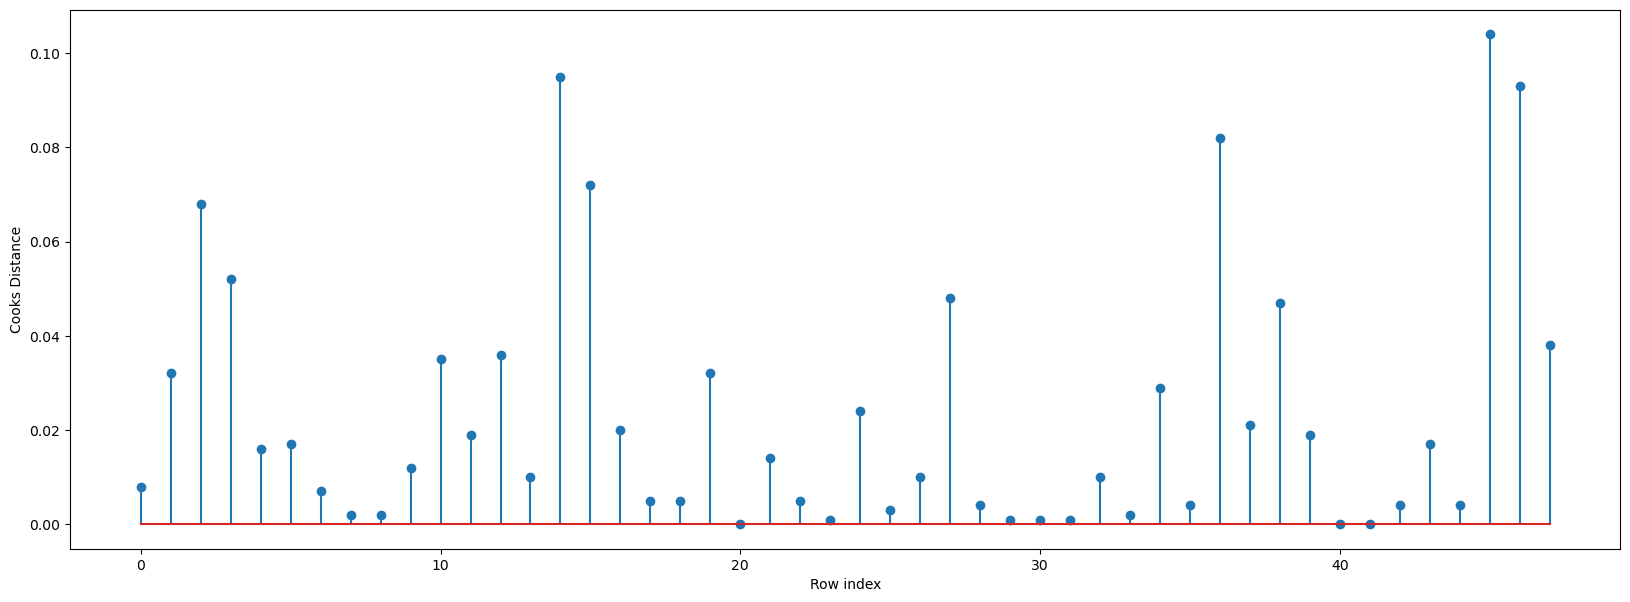

In [125]:
fig= plt.subplots(figsize=(20,7))
cd2=plt.stem(np.arange(len(data_P)),np.round(c_p,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [126]:
(np.argmax(c_p),np.max(c_p))

(45, 0.1036051987233018)

# Since the value is <1 , we can stop the diagnostic process and finalize the model

In [160]:
prof_df=pd.read_csv('C:\\Users\\lenovo\\OneDrive\\data science\\assignment\\multi linear regression\\50_Startups.csv')
prof_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [161]:
prof_df_1=pd.get_dummies(data=prof_df,columns=['State'],drop_first=True)

In [162]:
prof_df_1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [163]:
prof_df_1=prof_df_1.rename(columns={'R&D Spend':'RD','Administration':'Adm','Marketing Spend':'Mktg','State_Florida':'S_F','State_New York':'S_N'},inplace=True)

In [167]:
prof_df_1

In [165]:
model_p.predict(prof_df_2)

array([ 1.93163769,  1.85886512,  1.71113005,  1.5055959 ,  1.48352187,
        1.27882607,  1.17030613,  1.14678162,  0.95560364,  1.08686987,
        0.59756678,  0.64038215,  0.42168106,  0.40205131,  0.89469311,
        0.85490486,  0.15259842,  0.43654314,  0.42058592,  0.13373332,
        0.14526486,  0.10912694,  0.05998175, -0.04058272,  0.09595579,
       -0.19596203, -0.02287422,  0.04928812, -0.27337976, -0.22887859,
       -0.26135266, -0.32520118, -0.24593332, -0.31482118, -0.55206064,
       -0.46612212, -0.88863453, -0.43909158, -0.9551691 , -0.60729705,
       -0.85748088, -0.85437666, -0.93487286, -1.21143459, -1.10879891,
       -1.50824257, -1.3686616 , -1.52974154])